# Reserving
## Exercise 1 - Undiscounted premium provision for a single policy

Assume that you have just signed a new insurance cover for a motor liability insurance with a new customer. The customer is paying a premium of 1200 kr and the cover is for one year. Assume that the premium is going to be earned linearly. 

You expect to pay 180 kr of expenses attributed to this policy and the expenses are going to be paid also linearly over a year. 

Regarding the expected claim, your pricing team assesses that the claims can be modelled using compound Poisson model, where the number of claims between time $t$ and $T=1$ can be modelled as $N(t,T)\sim Poiss(\mu(T-t))$, where $\mu=0.01$ and the i-th claim size is modelled as $Z_i\sim \Gamma(32000,4)$ (using shape/rate parametrization.

1. Calculate the expected future profit on unearned exposure of the insurance company, both at sigining of the contract and at each day of the year (assume year has 360 days, month has 30 days). 
2. Assume that the premium is paid upfront. Calculate (undiscounted) premium provision (i.e. Solvency II reserve for un-earned exposure) as well as liability for remaining coverage (i.e. accounting reserve according to IFRS 17) for each day of the year and plot both on the same plot. What is the difference?
3. Assume that the premium is paid monthly upfront. Calculate again (undiscounted) premium provision as well as liability for remaining coverage for each day of the year and plot both on the same plot. Compare it to the point 2.



### Answer point 1
Calculate the expected future profit of the insurance company, both at sigining of the contract and at each day of the year (assume year has 365 days).

[1] "Expected profit at the beginning of the contract:"


[1] 220

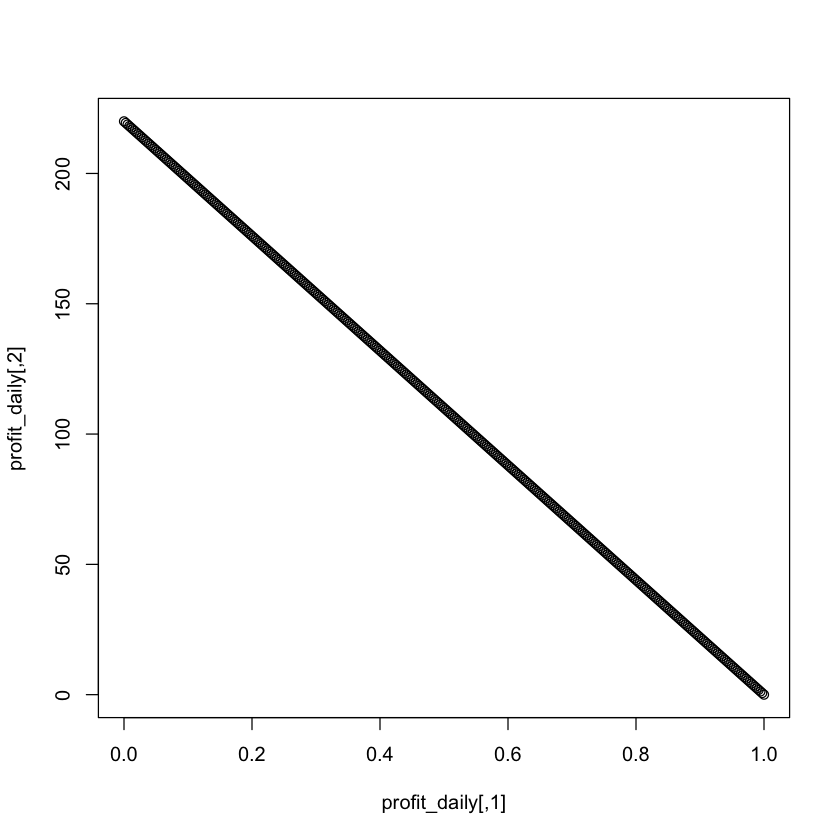

In [1]:
#inputs
T=1
t=0:360/360 #the grid with each day of the year
premiums<-1200
expenses <-180
mu<-0.01
alpha<-320000
beta<-4

#calculate the future expected profit at the beginning of the contract
profit<-premiums-expenses-mu*T*alpha/beta

print(paste("Expected profit at the beginning of the contract:"))
profit

#calculate the future expected profit on unearned exposure for each day of the day
profit_daily<-matrix(ncol=2,nrow=length(t))

for (i in 1:length(t)){
    profit_daily[i,]<-c(t[i],premiums*(T-t[i])-expenses*(T-t[i])-mu*(T-t[i])*alpha/beta)
}

plot(profit_daily)

### Answer point 2
Assume that the premium is paid upfront. Calculate (undiscounted) premium provision (i.e. Solvency II reserve for un-earned exposure) as well as liability for remaining coverage (i.e. accounting reserve according to IFRS 17) for each day of the year and plot both on the same plot. What is the difference?

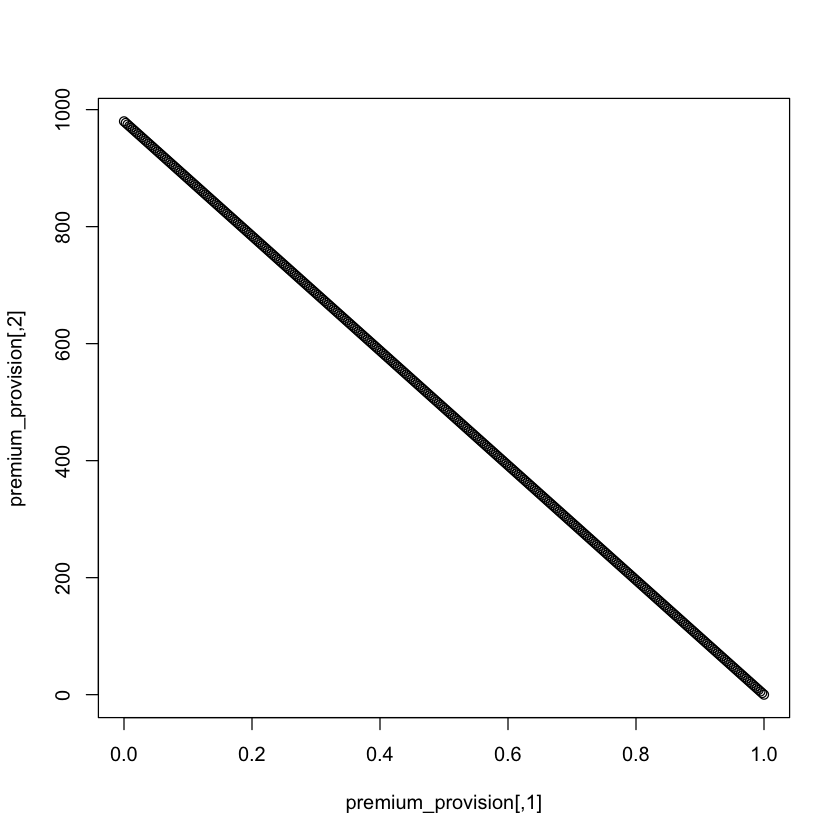

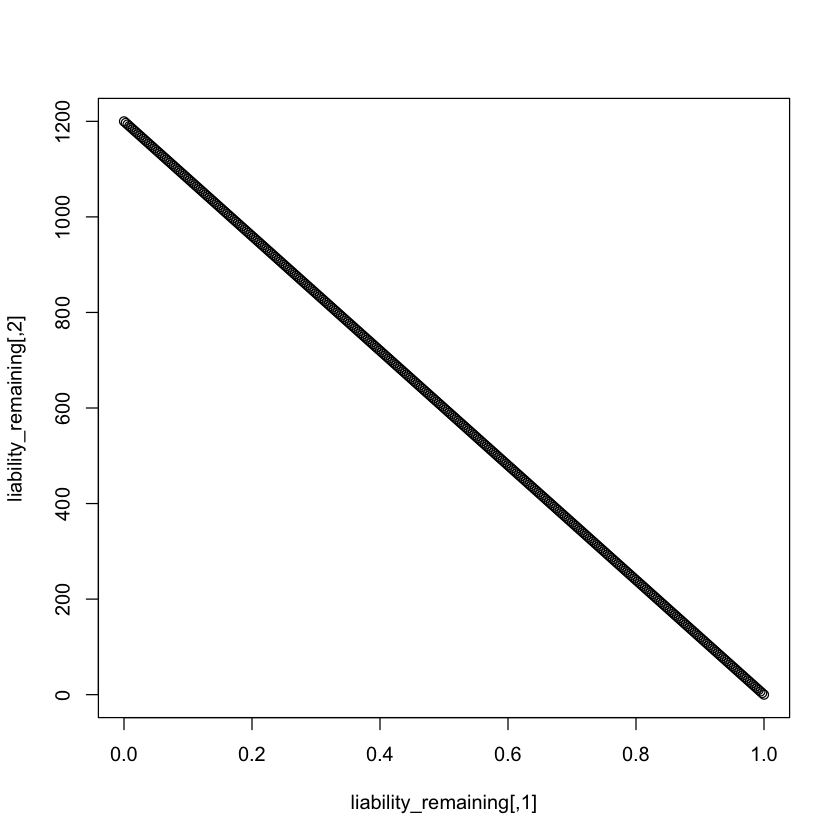

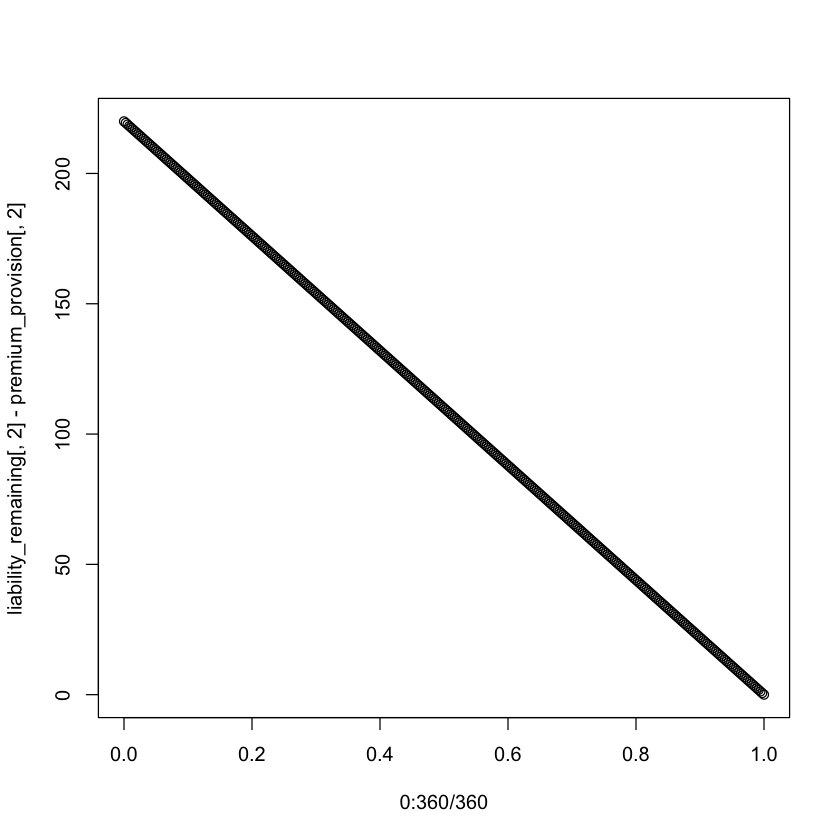

In [3]:
#define the function for premium provision
calculate_undiscounted_premium_provision<-function(start_time=0,end_time=1,t,mu,alpha,beta,premium_cashflows,
                                                   expense_cashflows){
    # start_time, end_time = start and end time for the coverate as a fraction of year
    # t <- current time
    # premium_cashflows, expense_cashflows = matrices with two columns: one is the timing of the cashflow, 
    #      the other is the size of the cashflow
    
    #undiscounted premium provision = -expected future premiums + expected future expenses + expected future claims
    
    #calculate expected future premiums
    future_premiums<-sum(premium_cashflows[premium_cashflows[,1]<=end_time&premium_cashflows[,1]>t,2])
    
    #calculate expected future expenses
    future_expenses<-sum(expense_cashflows[expense_cashflows[,1]<=end_time&expense_cashflows[,1]>t,2])
    
    #calculate expedted future claims
    future_claims<-mu*(end_time-t)*alpha/beta
    
    #calculate and return premium provision
    provision<- -future_premiums+future_expenses+future_claims
    return(provision)
}

#define the function for liability for remaining coverage
calculate_liability_remaining<-function(start_time=0,end_time=1,t,premium_cashflows){
    # start_time, end_time = start and end time for the coverate as a fraction of year
    # t <- current time
    # premium_cashflows = matrix with two columns: one is the timing of the cashflow, 
    #      the other is the size of the cashflow
    
    
    #liability for remaining coverage = unearned premium -expected future premiums
    
    premiums <- sum(premium_cashflows[,2])
    
    #calculate expected future premiums
    future_premiums<-sum(premium_cashflows[premium_cashflows[,1]<=end_time&premium_cashflows[,1]>t,2])
    
    liability_remaining<-0
    if ((t>=start_time)&&(t<end_time)){
        liability_remaining<- premiums*(end_time-t) -future_premiums
    }
    
    return(liability_remaining)
}

#prepare premium cashflow
premium_cashflows <- cbind(0:360/360,c(premiums,rep(0,times=360)))

#prepare expense cashflow
expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)))

#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    premium_provision[i+1,]<-c(i/360,
                               calculate_undiscounted_premium_provision(start_time=0,end_time=1,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows,expense_cashflows))
}

plot(premium_provision)                          
                      
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    liability_remaining[i+1,]<-c(i/360,
                               calculate_liability_remaining(start_time=0,end_time=1,t=i/360,premium_cashflows))
}
plot(liability_remaining) 

plot(0:360/360,liability_remaining[,2]-premium_provision[,2])

### Answer point 3
Assume that the premium is paid monthly upfront. Calculate again (undiscounted) premium provision as well as liability for remaining coverage for each day of the year and plot both on the same plot. Compare it to the point 2.

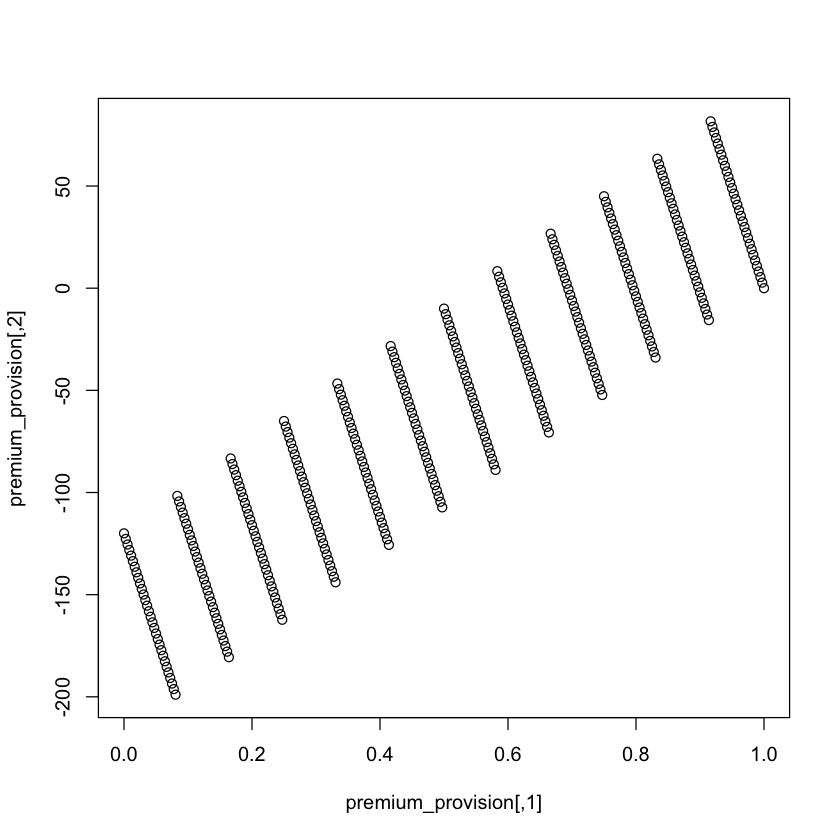

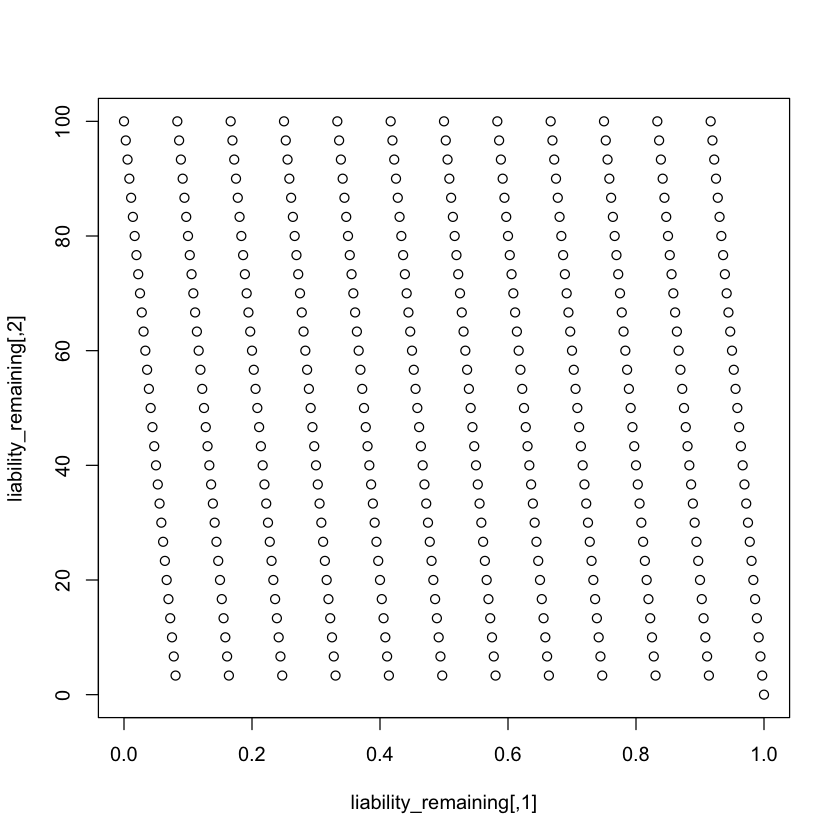

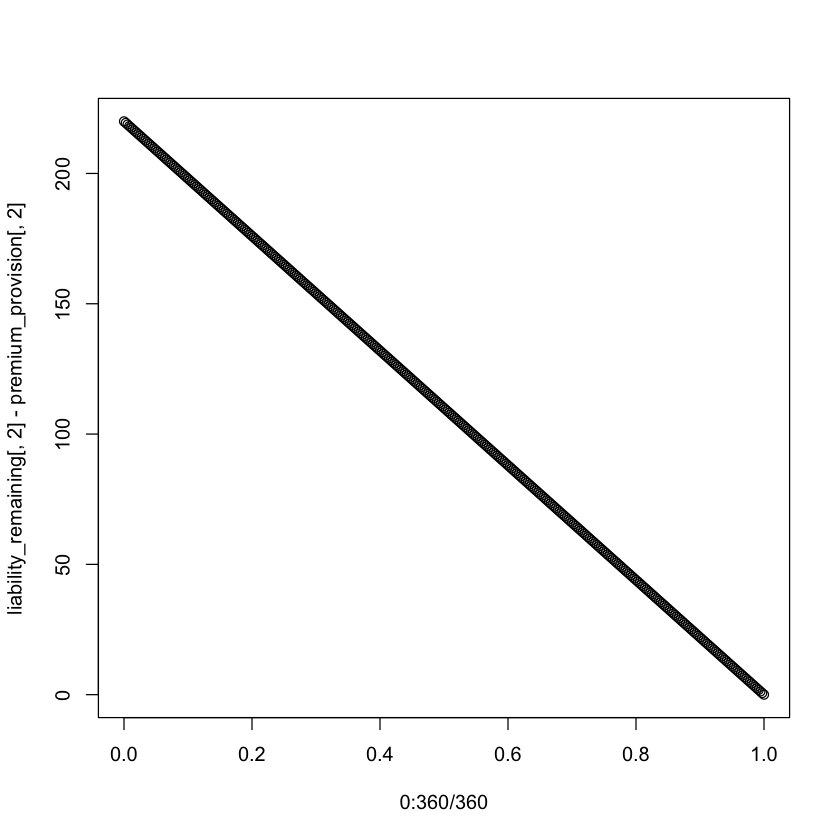

In [13]:
#prepare premium cashflow
premium_cashflows <- cbind(0:360/360,c(rep(0,times=361)))
for (i in 0:11/12){
    premium_cashflows[premium_cashflows[,1]==i,2]<-premiums/12

}

#prepare expense cashflow
expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)))

#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    premium_provision[i+1,]<-c(i/360,
                               calculate_undiscounted_premium_provision(start_time=0,end_time=1,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows,expense_cashflows))
}

plot(premium_provision)                          
                      
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    liability_remaining[i+1,]<-c(i/360,
                               calculate_liability_remaining(start_time=0,end_time=1,t=i/360,premium_cashflows))
}
plot(liability_remaining) 

plot(0:360/360,liability_remaining[,2]-premium_provision[,2])


## Exercise 2 - Undiscounted premium provision for a portfolio 

Assume now that you have 40 policies, each having exactly the same terms (including premiums) and risks as in exercise 1. The difference is that they have been written on different days. The dates when the policies are signed are 15 days apart: the first policy is signed on the 0-day, the second on the 15rd day, third on the 30th day etc. Calculate the premium provision and liability for remeaning coverage for the whole portfolio for each day (i.e from day 0 to day 360+40*15, i.e. the end of the coverage of the last policy)

Assume 
1. one time upfront premium
2. monthly premiums paid upfront.

### Answer point 1

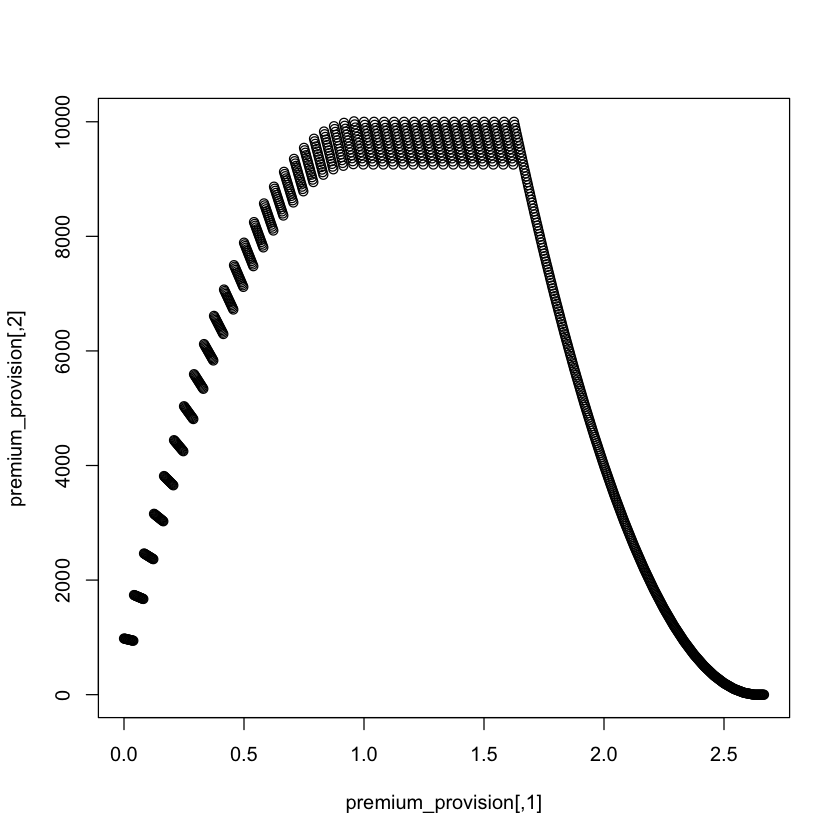

In [15]:

step=15
number_policies=40

#prepare premium cashflow
for (j in 1:number_policies){
   if (j==1){
       premium_cashflows <- cbind(0:360/360,c(premiums,rep(0,times=360)),j)
   } else
       premium_cashflows <- rbind(premium_cashflows,cbind((((j-1)*step):(360+step*(j-1)))/360,c(premiums,rep(0,times=360)),j))
}

#prepare expense cashflow
for (j in 1:number_policies){
   if (j==1){
       expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)),j)
   } else
       expense_cashflows <- rbind(expense_cashflows,cbind(0:360/360+(j-1)*step/360,c(expenses,rep(0,times=360)),j))
}


#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_undiscounted_premium_provision(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows[premium_cashflows[,3]==j,c(1,2)],
                                                                        expense_cashflows[expense_cashflows[,3]==j,c(1,2)])
        }
        
    premium_provision[i+1,]<-c(i/360,temp)
                               
    }
}

plot(premium_provision)                          
     

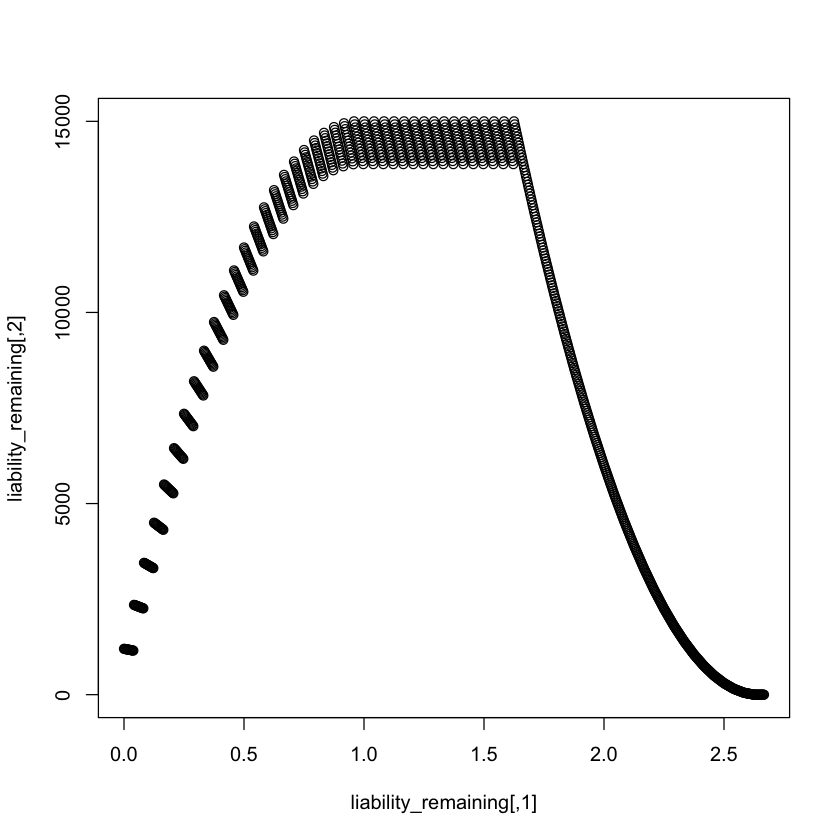

In [19]:
                 
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_liability_remaining(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                t=i/360,
                                                                premium_cashflows[premium_cashflows[,3]==j,c(1,2)])
        }
    }
    liability_remaining[i+1,]<-c(i/360,temp)
}
plot(liability_remaining) 


### Answer point 2

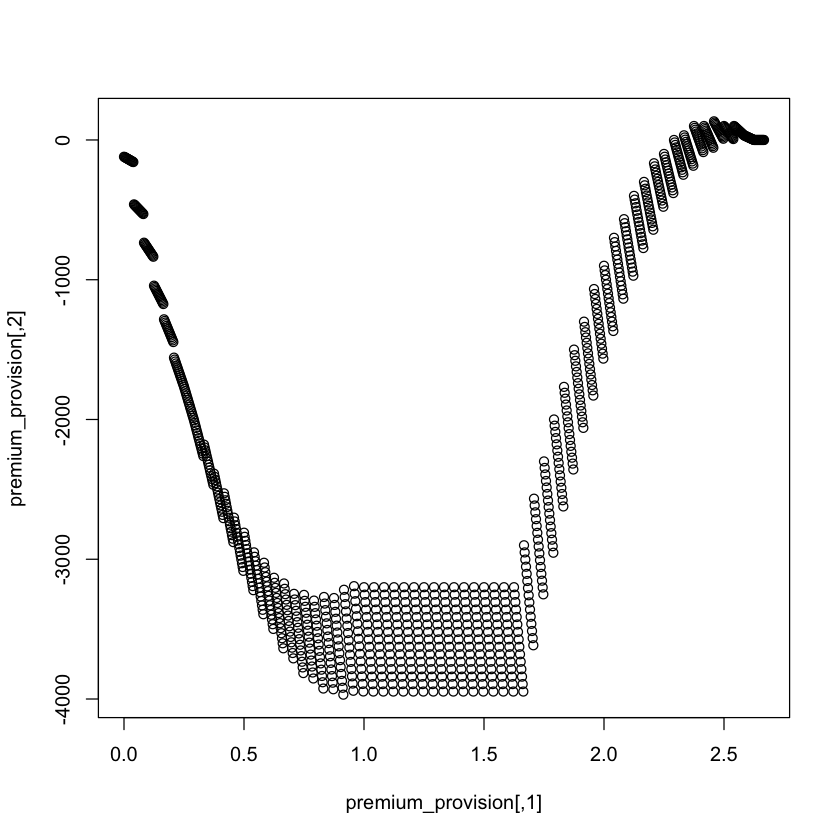

In [156]:
#prepare premium cashflow
for (j in 1:number_policies){
   if (j==1){
       premium_cashflows <- cbind(0:360/360,rep(0,times=361),j)
       for (i in 0:11){
            premium_cashflows[premium_cashflows[,1]==i*30/360,2]<-premiums/12
        }
   } else{
       temp<-cbind((((j-1)*step):(360+step*(j-1)))/360,rep(0,times=361))
       for (i in 0:11){
            temp[temp[,1]==(i*30+((j-1)*step))/360,2]<-premiums/12
        }
       premium_cashflows <- rbind(premium_cashflows,cbind(temp,j))
        
    }
}

#prepare expense cashflow
for (j in 1:number_policies){
   if (j==1){
       expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)),j)
   } else
       expense_cashflows <- rbind(expense_cashflows,cbind(0:360/360+(j-1)*step/360,c(expenses,rep(0,times=360)),j))
}


#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_undiscounted_premium_provision(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows[premium_cashflows[,3]==j,c(1,2)],
                                                                        expense_cashflows[expense_cashflows[,3]==j,c(1,2)])
        }
        
    premium_provision[i+1,]<-c(i/360,temp)
                               
    }
}

plot(premium_provision)                          
     

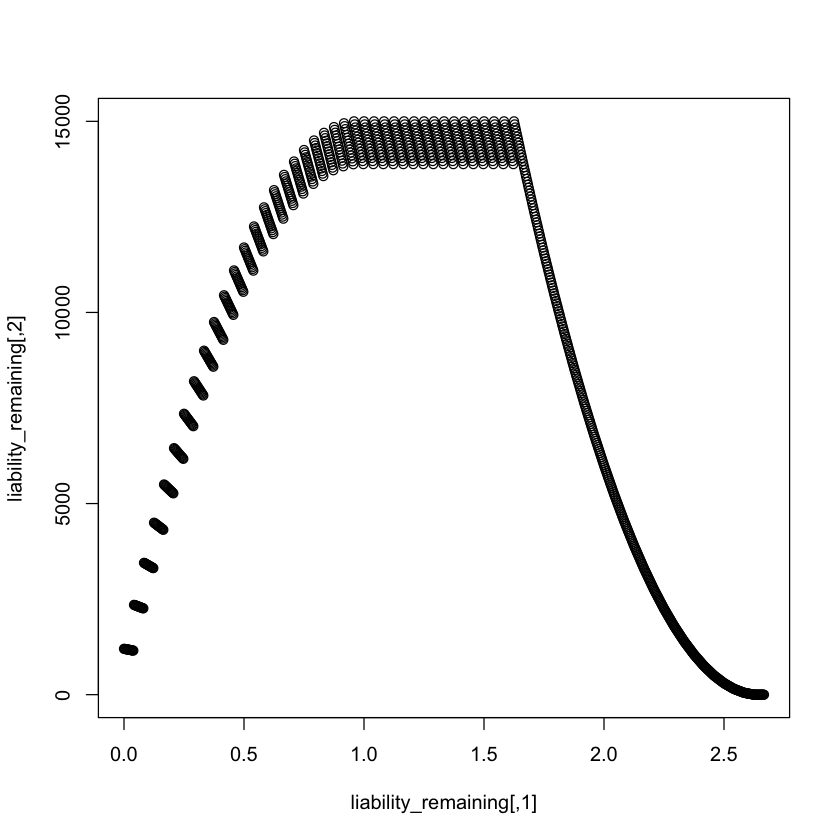

In [20]:
                 
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_liability_remaining(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                t=i/360,
                                                                premium_cashflows[premium_cashflows[,3]==j,c(1,2)])
        }
    }
    liability_remaining[i+1,]<-c(i/360,temp)
}
plot(liability_remaining) 

## Exercise 3 - reserve for earned exposure (Chain Ladder)

Assume that cumulative paid triangle of size $N$ is generated from the following process:

1. $C_{i,1}\sim i.i.d. LN(\mu,\sigma)$.
2. $C_{i,j+1}=C_{i,j}*f_j*Z_{i,j},\quad Z_{i,j}, i.i.d. \sim N(1,\sigma_Z)$ for some $f_j$. 

Do:
1. Check that chain ladder assumptions are satisfied.
2. Write a function generating this triangle.
3. Run the function on the following parameters $N=11, \mu=10, \sigma=0.25, \sigma_Z=0.05, f=(1.4,1.2,1.15,1.11,1.08,1.06,1.04,1.02,1.01,1.005)$. Save the triangle.
4. Compute the chain ladder development factors for the saved triangle and the undiscounted reserve per accident year and total.
5. Simulate the lower triangle $m=1000$ times (keeping the upper triangle as in 3). Compute the average of the reserves and compare it with the chain ladder estimate
6. Simulate the both lower and upper triangle $m=10000$ times. For each simulation compute the chain ladder reserves and the true difference in ultimate and the latest diagonal. Take a mean of both.
7. Redo the point 6 for a triangle with inflation $C^{inf}_{i,j+1}=C_{i,j}^{inf}+(C_{i,j}^{inf}*f_j*Z_{i,j}-C_{i,j}^{inf})*(1+I_{i+j})$ where $I_{n}=0.8*I_{n-1}+\epsilon_n, \epsilon_n\sim N(0.02,0.01)$ i.i.d. and $I_0=0.1$.

### Answer point 1 - blackboard
### Answer point 2

In [12]:

#generate triangle
generate_triangle<-function(N,mu,sigma,sigmaz,f){
    X=matrix(NA,nrow=N,ncol=N)
    X[,1]=rlnorm(N,mu,sigma)
    for (i in 1:(N-1)){
        for (j in 2:(N-i+1)){
            X[i,j]=X[i,j-1]*f[j-1]*rnorm(1,1,sigmaz)
        }
    }
    return(X)
}



### Answer point 3
3. Run the function on the following parameters $N=11, \mu=10, \sigma=0.25, \sigma_Z=0.05, f=(1.4,1.2,1.15,1.11,1.08,1.06,1.04,1.02,1.01,1.005)$. Save the triangle.

In [34]:
#input
N=11
mu=10
sigma=0.25
sigmaz=0.05
f=c(1.4,1.2,1.15,1.11,1.08,1.06,1.04,1.02,1.01,1.005)

X<-generate_triangle(N,mu,sigma,sigmaz,f)

In [35]:
X

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
 [1,] 23391.41 32183.38 34217.41 39183.71 44398.29 48731.22 50472.56 52424.11
 [2,] 16153.63 22915.51 27646.37 34597.42 37344.73 42585.77 42168.74 44689.08
 [3,] 14062.77 21362.25 26610.04 28494.42 29084.09 31945.30 35604.76 36753.54
 [4,] 27309.08 37825.62 42887.99 46207.69 50321.31 54954.10 57394.23 59703.35
 [5,] 24305.78 34399.68 39842.58 48453.07 50141.00 52071.71 55297.61       NA
 [6,] 26115.66 36642.41 40551.79 44663.99 51785.48 59563.25       NA       NA
 [7,] 16938.98 24930.73 33106.77 40231.16 44919.88       NA       NA       NA
 [8,] 10775.05 14622.27 18254.44 19898.11       NA       NA       NA       NA
 [9,] 15059.99 19946.24 23568.63       NA       NA       NA       NA       NA
[10,] 17920.76 25618.62       NA       NA       NA       NA       NA       NA
[11,] 22454.49       NA       NA       NA       NA       NA       NA       NA
      [,9]     [,10]    [,11]   
 [1,] 55603.42 55228.57 51521.32
 [2,] 43197.34 43403.78       NA
 [3,] 39849.61       NA       NA
 [4,]       NA       NA       NA
 [5,]       NA       NA       NA
 [6,]       NA       NA       NA
 [7,]       NA       NA       NA
 [8,]       NA       NA       NA
 [9,]       NA       NA       NA
[10,]       NA       NA       NA
[11,]       NA       NA       NA

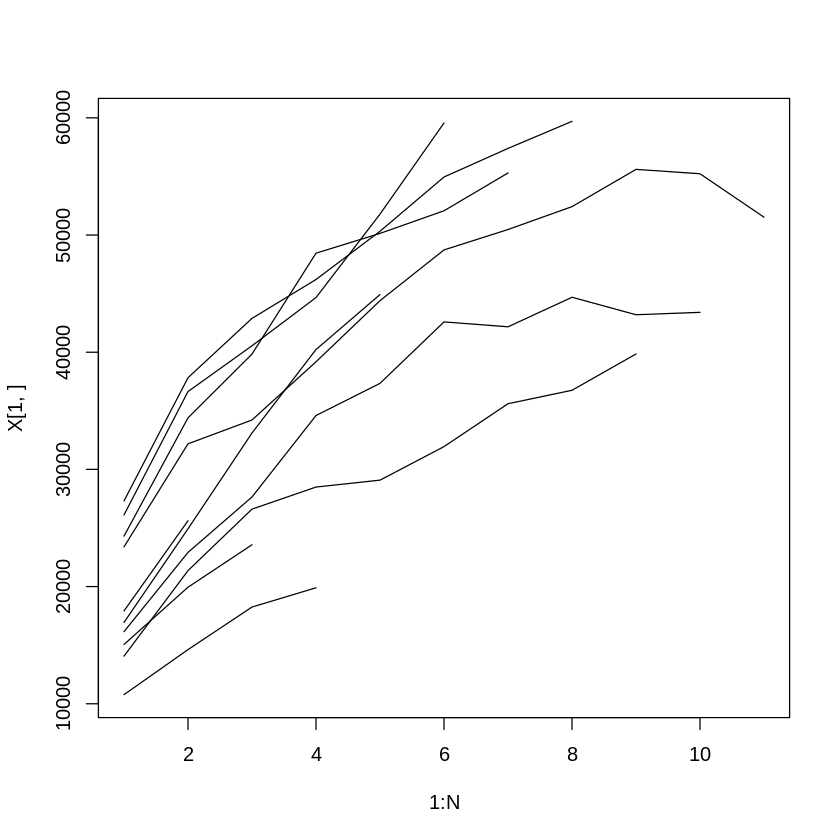

In [36]:
plot(1:N,X[1,], type="l",ylim=c(min(X,na.rm=TRUE),max(X,na.rm=TRUE)))
for (k in 2:ncol(X)) lines(1:(N-k+1),X[k,1:(N-k+1)])

### Answer point 4
 Compute the chain ladder development factors for the saved triangle and the undiscounted reserve per accident year and total undiscounted reserve. 

In [42]:
compute_CL_factors<-function(X){
    N=ncol(X)
    fhat<-rep(0,times=N-1)

    for (i in 1:(N-1)){
        fhat[i]=sum(X[1:(N-i),i+1])/sum(X[1:(N-i),i])
    }
    
    return(fhat)
}

compute_reserves<-function(X){
    N=ncol(X)
    fhat<-compute_CL_factors(X)
    reserve<-rep(0,times=N)
    for (i in 2:N){
        reserve[i]<-X[i,N-i+1]*prod(fhat[(N-1-i+2):(N-1)])-X[i,N-i+1]
    }
    return(reserve)
}


In [40]:
compute_CL_factors(X)

[1] 1.4083338 1.1709687 1.1467489 1.0928332 1.1017826 1.0462455 1.0427160
 [8] 1.0357342 0.9982956 0.9328745

In [43]:
compute_reserves(X)

[1]     0.000 -2913.502 -2738.288 -2115.698   318.813  3113.820  7159.381
 [8]  5312.997 10675.232 17967.627 31348.018

### Answer point 5

5. Simulate the lower triangle $m=10000$ times (keeping the upper triangle as in 3). Compute the average of the reserves and compare it with the chain ladder estimate

In [54]:
generate_lower_triangle_and_compute_reserve<-function(m,X,mu,sigma,sigmaz,f){
    N=ncol(X)
    true_difference<-matrix(0,nrow=N,ncol=m)
    for (k in 1:m){
        Y=X
        for (i in 2:(N)){
            for (j in (N-i+2):N){
                Y[i,j]=Y[i,j-1]*f[j-1]*rnorm(1,1,sigmaz) 
            }
            true_difference[i,k]=Y[i,N]-Y[i,N-i+1]
            
        }
    }
    reserve<-apply(true_difference,1,mean)
    return(reserve)
}
    
generate_lower_triangle_and_compute_reserve(m=10000,X,mu,sigma,sigmaz,f)  

[1]     0.0000   183.1441   591.4458  2150.7264  4162.8222  8395.3424
 [7] 10564.0428  7310.5168 13568.8125 22716.7417 36810.5135

### Answer point 6

6. Simulate the both lower and upper triangle $m=10000$ times. For each simulation compute the chain ladder reserves and the true difference in ultimate and the latest diagonal. Take a mean of both.

In [55]:
generate_lower_upper_triangle_and_compute_reserve<-function(m,N,mu,sigma,sigmaz,f){
    X=matrix(NA,nrow=N,ncol=N)
    X[,1]=rlnorm(N,mu,sigma)
    reserve<-matrix(0,nrow=N,ncol=m)
    true_difference<-matrix(0,nrow=N,ncol=m)
    for (k in 1:m){
        for (i in 1:(N)){
            for (j in 2:N){
                X[i,j]=X[i,j-1]*f[j-1]*rnorm(1,1,sigmaz)               
            }
            reserve[,k]<-compute_reserves(X)
            true_difference[i,k]=X[i,N]-X[i,N-i+1]
        }
    }
    reserve<-apply(reserve,1,mean)
    true_difference<-apply(true_difference,1,mean)
    return(cbind(reserve,true_difference))
}
    
generate_lower_upper_triangle_and_compute_reserve(m=10000,N,mu,sigma,sigmaz,f)  

reserve    true_difference
 [1,]     0.0000     0.0000     
 [2,]   285.3992   290.0074     
 [3,]   805.6964   783.8201     
 [4,]  1252.3836  1235.4222     
 [5,]  3028.5334  2899.5424     
 [6,]  7945.3176  7901.4877     
 [7,] 15162.9797 15066.6646     
 [8,] 23415.7274 23291.6227     
 [9,] 19987.7487 20079.6035     
[10,] 29458.3356 29418.7998     
[11,] 40889.2448 40858.4690

### Answer point 7

Redo the point 6 for a triangle with inflation $$C^{inf}_{i,j+1}=C_{i,j}^{inf}+(C_{i,j}^{inf}*f_j*Z_{i,j}-C_{i,j}^{inf})*(1+I_{i+j})$ where $I_{n}=0.8*I_{n-1}+\epsilon_n, \epsilon_n\sim N(0.02,0.01)$ i.i.d. and $I_0=0.1$.

In [87]:
generate_lower_upper_triangle_inf_and_compute_reserve<-function(m,N,mu,sigma,sigmaz,f,mu_inf,sigma_inf){
    X=matrix(NA,nrow=N,ncol=N)
    X[,1]=rlnorm(N,mu,sigma)
    reserve<-matrix(0,nrow=N,ncol=m)
    true_difference<-matrix(0,nrow=N,ncol=m)
    for (k in 1:m){
        epsilon=rnorm(2*N,mu_inf,sigma_inf)
        I=rep(0.1,times=2*N+1)
        for (i in 2:(2*N+1)){
            I[i]=0.8*I[i-1]+0.2*epsilon[i-1]
        }
        for (i in 1:(N)){
            for (j in 2:N){
                X[i,j]=(X[i,j-1]*f[j-1]*rnorm(1,1,sigmaz)-X[i,j-1])*(1+I[i+j-1])+X[i,j-1]               
            }
            reserve[,k]<-compute_reserves(X)
            true_difference[i,k]=X[i,N]-X[i,N-i+1]
        }
    }
    reserve<-apply(reserve,1,mean)
    true_difference<-apply(true_difference,1,mean)
    return(cbind(reserve,true_difference))
}
    
generate_lower_upper_triangle_inf_and_compute_reserve(m=10000,N,mu,sigma,sigmaz,f,0.02,0.01)  

reserve    true_difference
 [1,]     0.0000     0.0000     
 [2,]   348.9827   293.3303     
 [3,]  1032.9929   985.2041     
 [4,]  1906.8493  1960.3715     
 [5,]  4398.4270  4589.4999     
 [6,]  9550.2305  9459.9719     
 [7,]  9665.9774  9587.8561     
 [8,] 24993.1484 24630.6964     
 [9,] 26367.7896 25970.1620     
[10,] 36926.6289 36413.2457     
[11,] 45986.1655 44875.6378

# Exercise 4 (blackboard)

For $N=4$, generate a triangle as in previous exercise, round it up to intergers, and compute both the Chain Ladder development factors as well as the reserves per accident year and total on the blackboard.

In [89]:
#input
N=4
mu=10
sigma=0.25
sigmaz=0.05
f=c(1.4,1.2,1.15,1.11,1.08,1.06,1.04,1.02,1.01,1.005)

X<-generate_triangle(N,mu,sigma,sigmaz,f)
X<-round(X)
X

[,1]  [,2]  [,3]  [,4] 
[1,] 27572 34862 41497 44991
[2,] 15361 23636 28558    NA
[3,] 15893 22405    NA    NA
[4,] 21616    NA    NA    NA

In [90]:
compute_CL_factors(X)


[1] 1.375293 1.197562 1.084199

In [91]:
compute_reserves(X)

[1]     0.000  2404.551  6685.555 16983.147

# Exercise 5 - compound Poisson with uncertainty

Write a script for simulating the following compound Poisson models:
1. $X= \sum_{i=1}^N Z_i, where N\sim Pois(\mu*J*T), \mu = const., Z_i\sim LN(2,3)$
2. $X= \sum_{i=1}^N Z_i, where N\sim Pois(\mu*J*T), \mu \sim\Gamma(\alpha,\beta), Z_i\sim LN(2,3)$


Simulate the first model $n=100 000$ times and compute the mean and standard deviation for parameters $\mu=0.1, T=1$ and $J=100, 1000, 10000$

Simulate the second model $n=100 000$ times and compute the mean and standard deviation for parameters $\alpha=0.1, \beta=1, T=1$ as well as $\alpha=0.05, \beta=0.5$. $J=100, 1000, 10000$.

In [57]:
#program
generate_compound_poiss<-function(mu,J,xi,sigma,m){
    N <- rpois(m,mu*J)
    Xcal <- rep(0,m)
    for(i in 1:m)
      {
            Z <- Z <- rlnorm(N[i],xi,sigma)
            Xcal[i] <- sum(Z)
      }
    return(Xcal)
}

generate_compound_poiss_with_uncertaity<-function(J,alpha,beta,xi,sigma,m){
    lambda <-rgamma(m,shape=alpha,rate=beta)
    
    Xcal =sapply(mu,generate_compound_poiss,J=J,xi=xi,sigma=sigma,m=1)
    return(Xcal)
}



In [49]:
#Output without uncertainty

print("J=100 without uncertainty")
J=100
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 without uncertainty")
J=1000
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 without uncertainty")
J=10000
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

[1] "J=100 without uncertainty"
[1]  67.69941 987.10087  14.58064
[1] "J=1000 without uncertainty"
[1]  66.44206 339.43124   5.10868
[1] "J=10000 without uncertainty"
[1]  66.628541 149.837775   2.248853


In [59]:
#Output with uncertainty
print("J=100 with uncertainty, alpha=0.1, beta=1")
J=100
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 with uncertainty, alpha=0.1, beta=1")
J=1000
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 with uncertainty, alpha=0.1, beta=1")
J=10000
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))


[1] "J=100 with uncertainty, alpha=0.1, beta=1"
[1]   65.90127 1049.09337   15.91917
[1] "J=1000 with uncertainty, alpha=0.1, beta=1"
[1]  66.654318 484.269125   7.265383
[1] "J=10000 with uncertainty, alpha=0.1, beta=1"
[1]  66.427129 282.301581   4.249794


In [60]:
#Output with uncertainty
print("J=100 with uncertainty, alpha=0.05, beta=0.5")
J=100
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 with uncertainty, alpha=0.05, beta=0.5")
J=1000
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 with uncertainty, alpha=0.05, beta=0.5")
J=10000
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

[1] "J=100 with uncertainty, alpha=0.05, beta=0.5"
[1]   67.91077 1231.98465   18.14123
[1] "J=1000 with uncertainty, alpha=0.05, beta=0.5"
[1]  66.794724 450.317832   6.741817
[1] "J=10000 with uncertainty, alpha=0.05, beta=0.5"
[1]  66.921153 405.219929   6.055184
